In [4]:
import os
import regex
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
from chemformula import ChemFormula as cf

In [2]:
#PLOTTING SECTION
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.autolayout'] = True
matplotlib.rcParams['font.family'] = 'serif'

In [5]:
def plot_Davids(collected_data, vf): 
    
    #start the plotting stuff
    fig, ax = plt.subplots()
    plt.xlabel(r'Normalized sensitivity coefficient, $s_{i}$', fontsize=15)
    plt.title(f'Previous RMG | {vf}% 2-BTP')
    
    for (eq, sens) in collected_data: 
        ax.barh(eq, sens, color='tab:red', align='center')
        
    

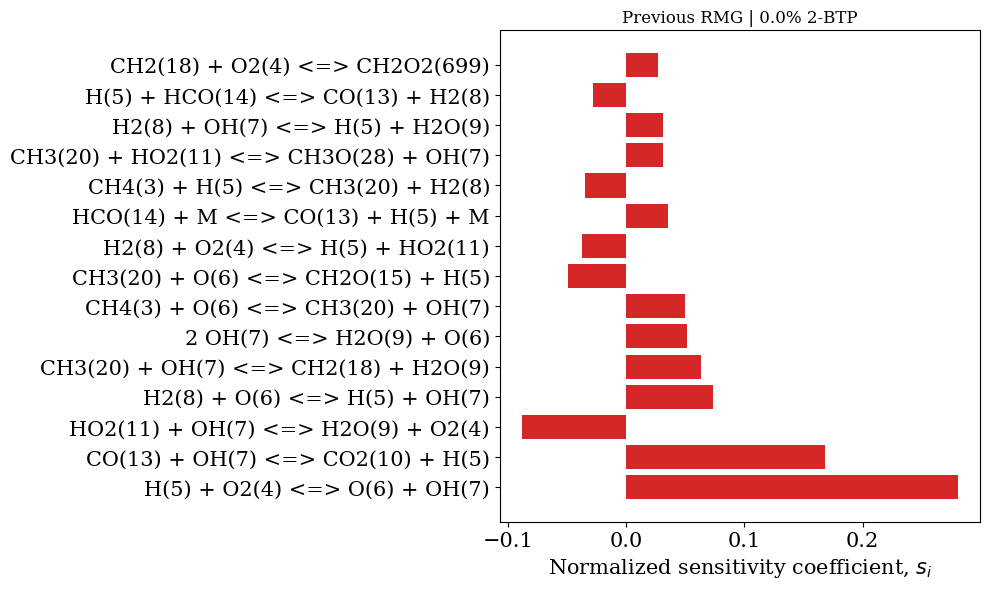

In [7]:
#let's iterate through David's reactions
n = 15 #this is the top n reactions we will look at in our sensitivity analysis 

#Davids_csvs = [file for file in os.listdir('.') if 'regular_sens_davids_original' in file]

# for file in [Davids_csvs[-1]]: 
file = 'chem_annotated.cti_0.0_regular_sens_davids_original.csv'
df = pd.read_csv(f'./{file}')
vf = regex.search('cti_(\S+)_regular', file).group(1)
#now we will collect data to plot 
collected_data = []

for index, row in df.head(n).iterrows(): 
    sens, eq = row['sensitivity'], row['cantera equation']
    collected_data.append((eq, sens))
#print(collected_data)
plot_Davids(collected_data, vf)

        

In [9]:
#for 0.0 of davids old model 
zero_equations = ['H + O2 <=> O + OH',
'CO + OH <=> CO2 + H',
'HO2 + OH <=> H2O + O2',
'H2 + O <=> H + OH',
'CH3 + OH <=> CH2 + H2O',
'2 OH <=> H2O + O',
'CH4 + O <=> CH3 + OH',
'CH3 + O <=> CH2O + H',
'H2 + O2 <=> H + HO2',
'HCO + M <=> CO + H + M',
'CH4 + H <=> CH3 + H2',
'CH3 + HO2 <=> CH3O + OH',
'H2 + OH <=> H + H2O',
'H + HCO <=> CO + H2',
'CH2 + O2 <=> CH2O2']

In [10]:
formatted_equations = []
for rxn in zero_equations: 
    changing_names = {}
    for spec in rxn.split(): 
        if regex.search('[A-Z][0-9]', spec):
            changing_names[spec]=cf(spec).unicode
    #now cycle through to change the equation 
    for old_name, new_name in changing_names.items():
        rxn=rxn.replace(old_name, new_name).replace('<=>', '⇌').replace('< = >', '⇌')
    formatted_equations.append(rxn)

In [11]:
zero_sens = []
for eq, sens in collected_data: 
    zero_sens.append(sens)

In [12]:
coll_data_edited=[]
for eq, sens in zip(formatted_equations, zero_sens):
    coll_data_edited.append((eq, sens))

In [13]:
coll_data_edited = [('H + O₂ ⇌ O + OH', 0.2810003406913561),
 ('CO + OH ⇌ CO₂ + H', 0.167862950123273),
 ('HO₂ + OH ⇌ H₂O + O₂', -0.0887861079907042),
 ('H₂ + O ⇌ H + OH', 0.0734500060047459),
 ('CH₃ + OH ⇌ CH₂ + H₂O', 0.0634287246357591),
 ('2 OH ⇌ H₂O + O', 0.051750928004389),
 ('CH₄ + O ⇌ CH₃ + OH', 0.0499414094699359),
 ('CH₃ + O ⇌ CH₂O + H', -0.0497187102724782),
 ('H₂ + O₂ ⇌ H + HO₂', -0.0377946483924641),
 ('HCO + M ⇌ CO + H + M', 0.0356026228869203),
 ('CH₄ + H ⇌ CH₃ + H₂', -0.0346746521082059),
 ('CH₃ + HO₂ ⇌ CH₃O + OH', 0.0313334378859352),
 ('H₂ + OH ⇌ H + H₂O', 0.0313010765905997),
 ('H + HCO ⇌ CO + H₂', -0.0283077028891258),
 ('CH₂ + O₂ ⇌ CH₂O₂', 0.0264450987718968)]

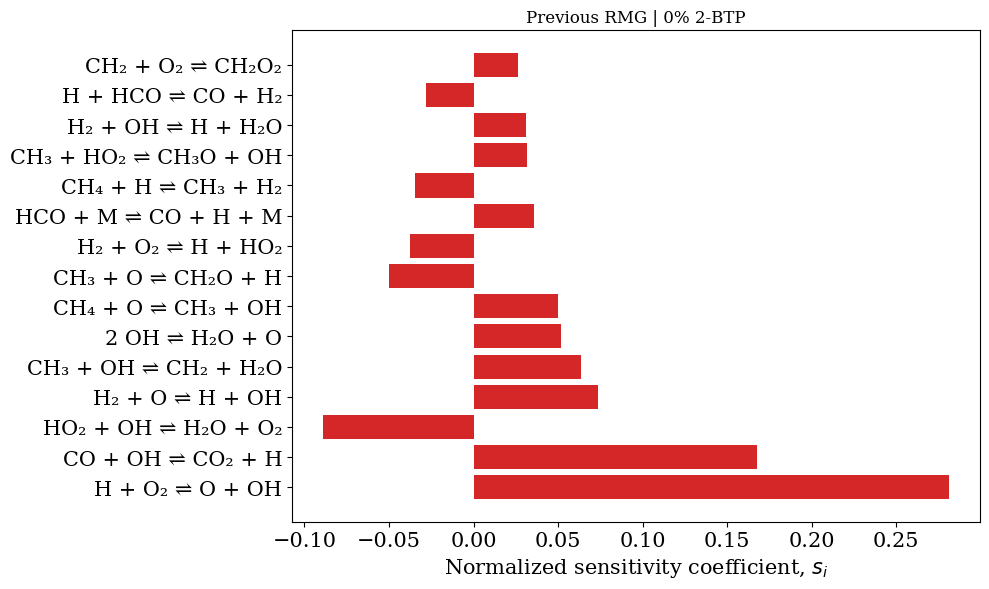

In [16]:
edited_vf = 0
if float(vf)== edited_vf:
    plot_Davids(coll_data_edited, 0)